In [1]:
import tensorflow as tf
# TensorFlow library ko import karta hai machine learning models banane ke liye.
from tensorflow.keras import layers, models, callbacks, optimizers
# Keras se neural network ke components import karta hai.
import numpy as np
# Numerical computations ke liye NumPy library import karta hai.
import matplotlib.pyplot as plt
# Data visualization ke liye Matplotlib ka pyplot module import karta hai.
import os
# File system operations ke liye OS module import karta hai.
from tensorflow.keras.preprocessing import image
# Image preprocessing ke liye Keras ka image module import karta hai.

In [2]:
gpus = tf.config.list_physical_devices('GPU')
#System mein available GPU devices ki list retrieve karta hai.

In [3]:
print("Available GPUs:", gpus)
# Available GPU devices ki list ko print karta hai.

Available GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# CIFAR-10 dataset ko training aur testing sets mein load karta hai.

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [5]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
# Training data aur labels ke shapes ko print karta hai.

x_train shape: (50000, 32, 32, 3) y_train shape: (50000, 1)


In [6]:
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)
# Testing data aur labels ke shapes ko print karta hai.

x_test shape: (10000, 32, 32, 3) y_test shape: (10000, 1)


In [7]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [8]:
import pandas as pd
# Pandas library ko import karta hai data frame banane ke liye.
# Flattening x_train for DataFrame
x_train_flattened = x_train.reshape(x_train.shape[0], -1)
# 4D array ko 2D array mein convert karta hai (50000, 3072).
df_x_train = pd.DataFrame(x_train_flattened)
 # Flattened x_train ko Pandas DataFrame mein convert karta hai.

In [9]:
x_train_reshaped = df_x_train.to_numpy().reshape(-1, 32, 32, 3)
# DataFrame ko wapas 4D array mein convert karta hai.

In [10]:
df_x_train_with_labels = pd.DataFrame(x_train_flattened)
# Flattened x_train ko DataFrame mein convert karta hai.

df_x_train_with_labels['label'] = y_train
# Labels ko DataFrame mein ek column ke roop mein jodta hai.

df_x_train_with_labels

0    1    2    3    4    5    6    7    8    9  ...  3063  3064  \
0       59   62   63   43   46   45   50   48   43   68  ...   216   184   
1      154  177  187  126  137  136  105  104   95  102  ...   143   133   
2      255  255  255  253  253  253  253  253  253  253  ...    78    85   
3       28   25   10   37   34   19   38   35   20   42  ...    54    47   
4      170  180  198  168  178  196  177  185  203  183  ...    75    79   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
49995  145  161  194  151  166  199  156  171  205  155  ...    39    41   
49996  255  245  132  254  247  134  255  249  137  254  ...   249   174   
49997   35  178  235   40  176  239   42  176  241   39  ...    27    52   
49998  189  211  240  186  208  236  185  207  235  184  ...   195   184   
49999  229  229  239  236  237  247  234  236  247  231  ...   179   177   

       3065  3066  3067  3068  3069  3070  3071  label  
0       140   151   118    84   123    92    72      6  
1       139   143   134   142   143   133   144      9  
2        83    79    85    83    80    86    84      9  
3        28    63    56    37    72    65    46      4  
4        82    71    75    78    73    77    80      1  
...     ...   ...   ...   ...   ...   ...   ...    ...  
49995    56    36    38    53    37    39    54      2  
49996    79   252   181    81   253   181    76      6  
49997    77    21    43    66    12    31    50      9  
49998   169   196   189   171   195   190   171      1  
49999   173   164   164   162   163   163   161      1  

[50000 rows x 3073 columns]

In [11]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# CIFAR-10 dataset ke labels ko class names se map karta hai.

In [12]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
# CIFAR-10 dataset ko load karta hai.
print(y_train[:5])
# Pehle 5 labels ko print karta hai (e.g., [[6], [9], [9], [4], [1]]).

[[6]
 [9]
 [9]
 [4]
 [1]]


In [13]:
print([class_names[label[0]] for label in y_train[:5]])
 # Numerical labels ko class names mein convert karta hai.

['frog', 'truck', 'truck', 'deer', 'automobile']


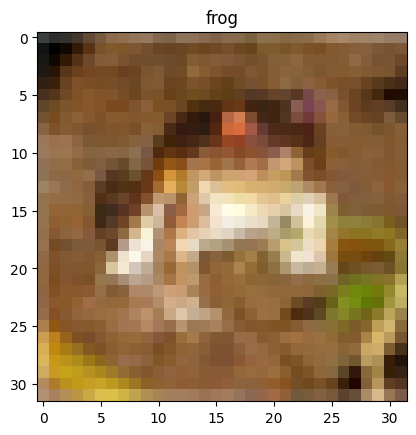

In [14]:
import matplotlib.pyplot as plt  # Visualization ke liye Matplotlib import karta hai.
plt.imshow(x_train[0])  # Pehli training image ko display karta hai.
plt.title(class_names[y_train[0][0]])  # Image ka label (class name) title ke roop mein dikhata hai.
plt.show()  # Plot ko display karta hai.

/tmp/ipython-input-2001157453.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(y_train[i])])  # Image ke label ko class_names se title ke roop mein dikhata hai.


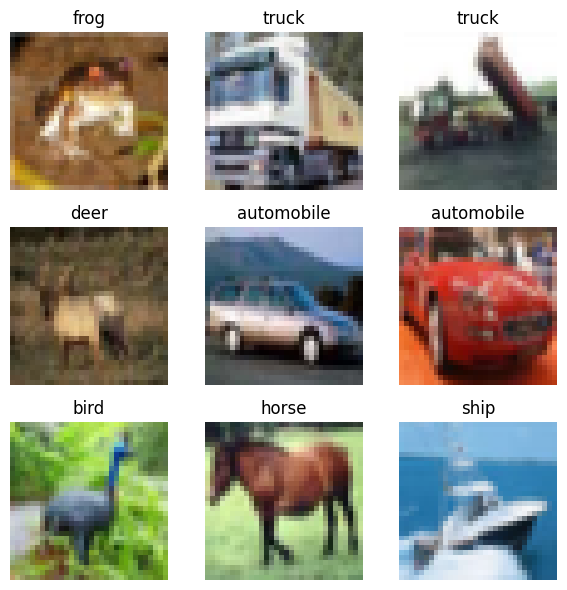

In [17]:
plt.figure(figsize=(6,6))  # 6x6 inch ka ek naya figure banata hai images display ke liye.
for i in range(9):  # 9 images ko loop ke zariye display karta hai.
    plt.subplot(3,3,i+1)  # 3x3 grid mein subplot banata hai, i+1 position pe.
    plt.imshow(x_train[i].astype('uint8'))  # x_train ki ith image ko uint8 format mein display karta hai.
    plt.title(class_names[int(y_train[i])])  # Image ke label ko class_names se title ke roop mein dikhata hai.
    plt.axis('off')  # Subplot ke axes ko hide karta hai.
plt.tight_layout()  # Subplots ke beech spacing ko adjust karta hai.
plt.show()  # Saare plots ko display karta hai.

In [18]:
x_train = x_train.astype('float32') / 255.0
# x_train ke pixel values ko float32 mein convert karta hai aur 0-1 range mein normalize karta hai.
x_test = x_test.astype('float32') / 255.0
# x_test ke pixel values ko float32 mein convert karta hai aur 0-1 range mein normalize karta hai.

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Image data augmentation aur preprocessing ke liye ImageDataGenerator class ko import karta hai.

In [20]:
batch_size = 64  # Ek baar mein 64 images ke batches banata hai training ke liye.

In [21]:
train_datagen = ImageDataGenerator( # Training data ke liye augmentation rules set karta hai.
    rotation_range=15,          # Images ko -15 se +15 degrees tak randomly rotate karta hai.
    width_shift_range=0.1,      # Images ko horizontally 10% tak shift karta hai.
    height_shift_range=0.1,     # Images ko vertically 10% tak shift karta hai.
    horizontal_flip=True,       # Images ko randomly horizontally flip karta hai.
    fill_mode='reflect'         # Shift ya rotation ke baad empty pixels ko reflect mode se fill karta hai.
)

In [23]:
train_generator = train_datagen.flow(x_train, y_train, batch_size=batch_size, shuffle=True)
# Training data ko batches mein generate karta hai aur augmentation apply karta hai.

In [25]:
model = models.Sequential()
# Ek Sequential neural network model initialize karta hai jisme layers ek ke baad ek jode jaate hain.

In [26]:
#Ek explicit Input layer joden
# shape=(32,32,3) batata hai ki input data 32x32 pixels ka hai aur 3 color channels (RGB) hain
# Yeh layer model ke liye input shape define karta hai, jo pehli layer ke liye zaroori hai
model.add(layers.Input(shape=(32,32,3)))


In [27]:
#----Block 1-----
# Pehli Convolutional layer joden
# 32 filters, 3x3 kernel, padding='same' se output size input jaisa rahta hai
# kernel_initializer='he_normal' weights ko He Normal initialization se set karta hai, jo ReLU ke liye achha hai
model.add(layers.Conv2D(32, (3,3), padding='same', kernel_initializer='he_normal'))

# Activation layer joden
# ReLU activation non-linearity add karta hai, negative values ko zero karta hai
model.add(layers.Activation('relu'))

# BatchNormalization layer joden
# Har batch ke liye inputs ko normalize karta hai, training ko stable aur tezi deta hai
model.add(layers.BatchNormalization())

# Dusri Convolutional layer joden
# 32 filters, 3x3 kernel, padding='same' se output size wahi rahta hai
model.add(layers.Conv2D(32, (3,3), padding='same'))

# Dusri Activation layer joden
# ReLU activation phir se non-linearity ke liye
model.add(layers.Activation('relu'))

# MaxPooling layer joden
# 2x2 window mein maximum value lekar spatial size ko 32x32 se 16x16 karta hai
# Yeh computation kam karta hai aur overfitting se bachata hai
model.add(layers.MaxPooling2D((2,2)))  # spatial size 32->16

# Dropout layer joden
# Training ke dauran 25% inputs ko randomly zero karta hai, overfitting se bachane ke liye
model.add(layers.Dropout(0.25))

In [29]:
# --- Block 2 ---
# First Convolutional layer joden
# 64 filters, 3x3 kernel, padding='same' se output size input jaisa (16x16) rahta hai
# Yeh layer aur complex features seekhta hai
model.add(layers.Conv2D(64, (3,3), padding='same'))

# Activation layer joden
# ReLU activation negative values ko zero karta hai, non-linearity add karta hai
model.add(layers.Activation('relu'))

# BatchNormalization layer joden
# Har batch ke inputs ko normalize karta hai, training ko stable aur tezi deta hai
model.add(layers.BatchNormalization())

# Dusri Convolutional layer joden
# 64 filters, 3x3 kernel, padding='same' se output size wahi (16x16) rahta hai
# Yeh layer aur gehre features seekhta hai
model.add(layers.Conv2D(64, (3,3), padding='same'))

# Dusri Activation layer joden
# ReLU activation phir se non-linearity ke liye
model.add(layers.Activation('relu'))

# MaxPooling layer joden
# 2x2 window mein maximum value lekar spatial size ko 16x16 se 8x8 karta hai
# Yeh computation kam karta hai aur overfitting se bachata hai
model.add(layers.MaxPooling2D((2,2)))  # spatial size 16->8

# Dropout layer joden
# Training ke dauran 25% inputs ko randomly zero karta hai, overfitting se bachane ke liye
model.add(layers.Dropout(0.25))

In [30]:
# --- Block 3 ---
# First Convolutional layer joden
# 128 filters, 3x3 kernel, padding='same' se output size input jaisa (8x8) rahta hai
# Yeh layer aur bhi complex features seekhta hai
model.add(layers.Conv2D(128, (3,3), padding='same'))

# Activation layer joden
# ReLU activation negative values ko zero karta hai, non-linearity add karta hai
model.add(layers.Activation('relu'))

# BatchNormalization layer joden
# Har batch ke inputs ko normalize karta hai, training ko stable aur tezi deta hai
model.add(layers.BatchNormalization())

# MaxPooling layer joden
# 2x2 window mein maximum value lekar spatial size ko 8x8 se 4x4 karta hai
# Yeh computation kam karta hai aur overfitting se bachata hai
model.add(layers.MaxPooling2D((2,2)))  # spatial size 8->4

# Dropout layer joden
# Training ke dauran 25% inputs ko randomly zero karta hai, overfitting se bachane ke liye
model.add(layers.Dropout(0.25))

In [31]:
# --- Head ---
# Flatten layer joden
# Feature maps (4x4x128) ko 1D vector mein badalta hai, dense layers ke liye zaroori
model.add(layers.Flatten())  # feature maps -> vector

# Dense layer joden
# 256 units ke saath, high-level features ko combine karta hai
model.add(layers.Dense(256))

# Activation layer joden
# ReLU activation negative values ko zero karta hai, non-linearity add karta hai
model.add(layers.Activation('relu'))

# BatchNormalization layer joden
# Har batch ke inputs ko normalize karta hai, training ko stable aur tezi deta hai
model.add(layers.BatchNormalization())

# Dropout layer joden
# Training ke dauran 50% inputs ko randomly zero karta hai, overfitting se bachane ke liye
model.add(layers.Dropout(0.5))

# Output Dense layer joden
# 10 units (10 classes ke liye, jaise CIFAR-10), softmax activation probabilities deta hai
model.add(layers.Dense(10, activation='softmax'))

In [32]:
#Model ka summary dikhayen
# Har layer ka naam, output shape, aur trainable parameters ka vivran deta hai
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 349,354 (1.33 MB)

 Trainable params: 348,266 (1.33 MB)

 Non-trainable params: 1,088 (4.25 KB)

In [33]:
# Model ko compile karen
# optimizer=Adam(learning_rate=1e-3) model ke weights ko update karta hai, learning rate 0.001 hai
# loss='sparse_categorical_crossentropy' integer labels (0-9) ke liye classification loss calculate karta hai
# metrics=['accuracy'] training aur validation ke dauran model ki accuracy track karta hai
model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',   # labels integers 0..9
    metrics=['accuracy']
)

In [34]:
# Checkpoint path define karen jahan model save hoga
# "best_cifar10_model.keras" file mein sirf sabse achha model save hoga
checkpoint_path = "best_cifar10_model.keras"

# ModelCheckpoint callback banayen
# Yeh har epoch ke baad model save karta hai jab val_accuracy improve hoti hai
# monitor='val_accuracy' validation accuracy ko track karta hai
# save_best_only=True sirf sabse achha model save karta hai
# verbose=1 save hone par message dikhata hai
cb_checkpoint = callbacks.ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, verbose=1)

# EarlyStopping callback banayen
# Yeh training rok deta hai agar val_accuracy 8 epochs tak improve na ho
# monitor='val_accuracy' validation accuracy ko track karta hai
# patience=8 matlab 8 epochs tak wait karega improvement ke liye
# restore_best_weights=True sabse achhe weights ko restore karta hai
# verbose=1 rokne par message dikhata hai
cb_early = callbacks.EarlyStopping(monitor='val_accuracy', patience=8, restore_best_weights=True, verbose=1)

# ReduceLROnPlateau callback banayen
# Yeh learning rate kam karta hai agar val_loss 4 epochs tak improve na ho
# monitor='val_loss' validation loss ko track karta hai
# factor=0.5 learning rate ko 50% kam karta hai
# patience=4 matlab 4 epochs tak wait karega
# min_lr=1e-6 learning rate ko isse niche nahi jane deta
# verbose=1 learning rate change hone par message dikhata hai
cb_reduce = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=1e-6, verbose=1)

In [35]:
# Total epochs set karen
# epochs=30 matlab model 30 baar pure training data par train karega
epochs = 30

# Har epoch ke liye steps calculate karen
# x_train.shape[0] training samples ki sankhya hai, batch_size se divide karke steps_per_epoch milta hai
# Yeh batata hai ki ek epoch mein kitne batches process honge
steps_per_epoch = x_train.shape[0] // batch_size

# Model ko train karen
# train_generator batches mein training data deta hai, augmentation ke saath
# steps_per_epoch har epoch mein kitne batches process karta hai
# epochs=30 training ke maximum rounds set karta hai
# validation_data=(x_test, y_test) validation ke liye test data use karta hai
# callbacks=[cb_checkpoint, cb_early, cb_reduce] model saving, early stopping, aur learning rate ko control karte hain
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=(x_test, y_test),
    callbacks=[cb_checkpoint, cb_early, cb_reduce]
)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


780/781 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.2597 - loss: 2.3529
Epoch 1: val_accuracy improved from -inf to 0.44280, saving model to best_cifar10_model.keras
781/781 ━━━━━━━━━━━━━━━━━━━━ 55s 54ms/step - accuracy: 0.2599 - loss: 2.3519 - val_accuracy: 0.4428 - val_loss: 1.5859 - learning_rate: 0.0010
Epoch 2/30
  1/781 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.4375 - loss: 1.4129

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_accuracy did not improve from 0.44280
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4375 - loss: 1.4129 - val_accuracy: 0.4306 - val_loss: 1.6318 - learning_rate: 0.0010
Epoch 3/30
780/781 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4736 - loss: 1.4384
Epoch 3: val_accuracy improved from 0.44280 to 0.50050, saving model to best_cifar10_model.keras
781/781 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.4737 - loss: 1.4382 - val_accuracy: 0.5005 - val_loss: 1.4585 - learning_rate: 0.0010
Epoch 4/30
  1/781 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.5625 - loss: 1.2844
Epoch 4: val_accuracy did not improve from 0.50050
781/781 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5625 - loss: 1.2844 - val_accuracy: 0.4964 - val_loss: 1.4721 - learning_rate: 0.0010
Epoch 5/30
780/781 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5657 - loss: 1.2089
Epoch 5: val_accuracy improved from 0.50050 to 0.56790, saving model to best_cifar10_model.keras
781/781 ━━━━━━━━━

In [36]:
# Model ka test dataset par performance evaluate karen
# x_test aur y_test test data aur labels hain
# verbose=2 evaluation ke dauran har batch ka summary dikhata hai
# test_loss aur test_acc mein loss aur accuracy store hoti hai
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

# Test loss print karen
# Yeh batata hai ki test data par model ka average loss kitna hai
print("Test loss:", test_loss)

# Test accuracy print karen
# Yeh batata hai ki test data par model kitne percent predictions sahi karta hai
print("Test accuracy:", test_acc)

313/313 - 1s - 3ms/step - accuracy: 0.8193 - loss: 0.5424
Test loss: 0.5424357652664185
Test accuracy: 0.8192999958992004


In [37]:
# Model ko file mein save karen
# "cifar10_cnn_full.keras" file mein model ki puri architecture, weights, aur optimizer state save hota hai
model.save("cifar10_cnn_full.keras")

# Confirmation message print karen
# Yeh batata hai ki model successfully save ho gaya hai
print("Saved model to cifar10_cnn_full.keras")

Saved model to cifar10_cnn_full.keras


In [38]:
# TensorFlow se zaroori module import karen
import tensorflow as tf

# Save kiya hua model load karen
# "cifar10_cnn_full.keras" file se model ki architecture, weights, aur optimizer state load hota hai
loaded_model = tf.keras.models.load_model("cifar10_cnn_full.keras")

# Confirmation message aur model summary print karen
# Yeh batata hai ki model load ho gaya aur uski architecture details dikhata hai
print("Loaded model summary:")
loaded_model.summary()

Loaded model summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,045,888 (3.99 MB)

 Trainable params: 348,266 (1.33 MB)

 Non-trainable params: 1,088 (4.25 KB)

 Optimizer params: 696,534 (2.66 MB)

In [39]:
# Test dataset se ek sample ka index chunen
# sample_idx=5 matlab 6th test image (index 5) par prediction karenge
sample_idx = 5

In [40]:
# Single image ko model ke liye taiyar karen
# x_test[sample_idx] ek image hai (shape: 32,32,3), np.expand_dims uske shape ko (1,32,32,3) banata hai
# Model ko batch dimension chahiye, isliye axis=0 add kiya
single_input = np.expand_dims(x_test[sample_idx], axis=0)  # shape (1,32,32,3)

In [41]:
# Model se prediction karen
# loaded_model.predict(single_input) ek image ke liye 10 class probabilities deta hai (shape: 1,10)
preds = loaded_model.predict(single_input)                # shape (1,10)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [42]:
# Predicted class ka index nikalen
# np.argmax(preds[0]) sabse zyada probability wala class index deta hai (0 se 9)
# int() isko integer mein convert karta hai
pred_label_idx = int(np.argmax(preds[0]))

In [43]:
# Predicted class ki probability nikalen
# np.max(preds[0]) sabse zyada probability value deta hai
# float() isko float mein convert karta hai
pred_prob = float(np.max(preds[0]))

In [44]:
# Predicted class aur probability print karen
# class_names[pred_label_idx] index se class name (jaise 'cat') deta hai
# pred_prob uski confidence (0.0 se 1.0) dikhata hai
print("Predicted:", class_names[pred_label_idx], "Prob:", pred_prob)

Predicted: frog Prob: 0.9968701004981995


In [45]:
# Actual class print karen
# y_test[sample_idx] test image ka true label index hai (0 se 9)
# class_names[int(y_test[sample_idx])] se true class name milta hai
print("Actual  :", class_names[int(y_test[sample_idx])])

Actual  : frog


/tmp/ipython-input-3377839976.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Actual  :", class_names[int(y_test[sample_idx])])


In [49]:
# Image file ka path define karen
# "/content/sample_image.png" local image file ka location hai
img_path = "/content/Frog.jpeg" #"/content/Tru.jpeg" #"/content/Tr.jpeg"      #"/content/horse.jpeg"

# Check karen ki image file exist karti hai ya nahi
# os.path.exists(img_path) True deta hai agar file mojood ho
if os.path.exists(img_path):
    # Image ko load aur resize karen
    # image.load_img 32x32 size mein image load karta hai, model ke input ke liye
    pil_img = image.load_img(img_path, target_size=(32,32))      # resize to model input

    # Image ko array mein convert aur normalize karen
    # image.img_to_array PIL image ko numpy array mein badalta hai, /255.0 pixel values ko 0-1 range mein normalize karta hai
    arr = image.img_to_array(pil_img).astype('float32') / 255.0 # normalize same way

    # Batch dimension add karen
    # np.expand_dims array ke shape ko (32,32,3) se (1,32,32,3) banata hai, model ke liye zaroori
    arr = np.expand_dims(arr, axis=0)

    # Model se prediction karen
    # loaded_model.predict(arr) ek image ke liye 10 class probabilities deta hai (shape: 1,10)
    preds2 = loaded_model.predict(arr)

    # Predicted class ka index nikalen
    # np.argmax(preds2[0]) sabse zyada probability wala class index deta hai (0 se 9)
    idx2 = int(np.argmax(preds2[0]))

    # Predicted class ki probability nikalen
    # np.max(preds2[0]) sabse zyada probability value deta hai
    prob2 = float(np.max(preds2[0]))

    # Predicted class aur probability print karen
    # class_names[idx2] index se class name (jaise 'cat') deta hai, prob2 confidence dikhata hai
    print("Local image prediction:", class_names[idx2], "Prob:", prob2)
else:
    # Agar file nahi milti, toh error message print karen
    # Yeh batata hai ki image file path par nahi hai
    print("No local sample_image.png found at", img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Local image prediction: frog Prob: 0.9369250535964966
